In [6]:
import SimpleITK as sitk
import numpy as np
import csv
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [124]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)
    numpyOrigin = np.flipud(itkimage.GetOrigin())
    numpySpacing = np.flipud(itkimage.GetSpacing())
    return numpyImage, numpyOrigin, numpySpacing


In [125]:
def readCSV(filename):
    lines = []
    with open(filename, "r") as f:
        csvreader = csv.reader(f)
        for line in csvreader:
            lines.append(line)
    return lines


In [126]:
def worldToVoxelCoord(worldCoord, origin, spacing):
    stretchedVoxelCoord = np.absolute(worldCoord - origin)
    voxelCoord = stretchedVoxelCoord / spacing
    return voxelCoord

In [127]:
def normalizePlanes(npzarray):
    maxHU = 400.
    minHU = -1000.
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray>1] = 1.
    npzarray[npzarray<0] = 0.
    return npzarray

In [128]:
patch.min(), patch.max()

(0.04642857142857143, 0.73142857142857143)

In [129]:
img_path = '/Volumes/Backups/data/LUNA16/subset1/1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886.mhd'
cand_path = '/Volumes/Backups/data/LUNA16/candidates3.csv'

In [130]:
numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)
print (numpyImage.shape)
print (numpyOrigin.shape)
print (numpyOrigin)
print (numpySpacing)

(123, 512, 512)
(3,)
[-338.       -210.       -212.199997]
[ 2.5         0.82031202  0.82031202]


/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


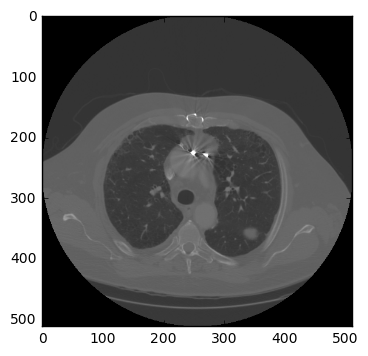

In [131]:
 plt.imshow(numpyImage[voxelCoord[0]], cmap='gray')

In [132]:
# load candidates

cands = readCSV(cand_path)

In [133]:
cands

[['seriesuid', 'coordX', 'coordY', 'coordZ', 'class'],
 ['1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886',
  '64.1029275775',
  '84.9841485639',
  '-95.2610904146',
  '1'],
 ['1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886',
  '66.1283826307',
  '91.4358740771',
  '-121.999167539',
  '1'],
 ['1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886',
  '58.1060597023',
  '81.3088980717',
  '-97.8160367908',
  '1'],
 ['1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886',
  '67.61451718',
  '85.02525992',
  '-109.8084416',
  '1'],
 ['1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886',
  '75.7212243102',
  '92.8873310394',
  '-119.270564052',
  '1'],
 ['1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886',
  '57.3694276965',
  '83.2399662237',
  '-114.664766642',
  '1'],
 ['1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886',
  '75.2239949525',
  '79.4552680171',
  '-121.430168337',
  '1'],

In [134]:
type(numpyImage)

numpy.ndarray

In [135]:
cand


['1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886',
 '69.4415285914',
 '76.6027472274',
 '-121.084237546',
 '1']

/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


data
[-121.08423755   69.44152859   76.60274723]
[  86.76630498  343.33463077  349.38259971]
[[ 0.24642857  0.50857143  0.72214286 ...,  0.11642857  0.09714286
   0.09642857]
 [ 0.26928571  0.53642857  0.68285714 ...,  0.09714286  0.07785714
   0.09642857]
 [ 0.33928571  0.56857143  0.59428571 ...,  0.09071429  0.08        0.09      ]
 ..., 
 [ 0.065       0.06357143  0.06857143 ...,  0.925       0.96857143
   0.99785714]
 [ 0.09285714  0.09428571  0.11571429 ...,  0.95071429  0.995       0.99928571]
 [ 0.05857143  0.06857143  0.08642857 ...,  0.96357143  0.99857143
   0.96071429]]
[-338.       -210.       -212.199997]


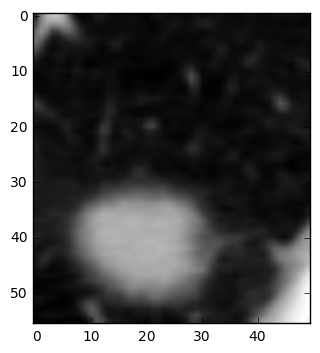

In [136]:
patch = numpyImage[voxelCoord[0],voxelCoord[1]-voxelWidth/2:voxelCoord[2]+voxelWidth/2,voxelCoord[2]-voxelWidth/2:voxelCoord[2]+voxelWidth/2]
patch = normalizePlanes(patch)
print ('data')
print (worldCoord)
print (voxelCoord)
print (patch)
print (numpyOrigin)
outputDir = 'patches/'
plt.imshow(patch, cmap='gray')
plt.show()

In [137]:
a=cands[4][:]
a
# a.reverse()
# b

['1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886',
 '67.61451718',
 '85.02525992',
 '-109.8084416',
 '1']

data
[-95.26109041  84.98414856  64.10292758]
[  97.09556383  359.59993299  336.82661814]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


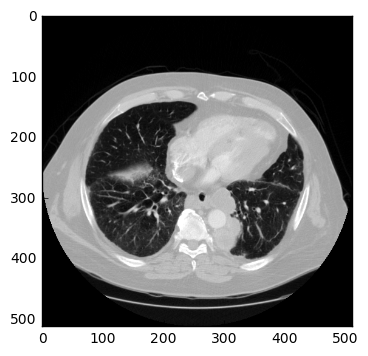

data
[-121.99916754   91.43587408   66.12838263]
[  86.40033298  367.46489819  339.29574573]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


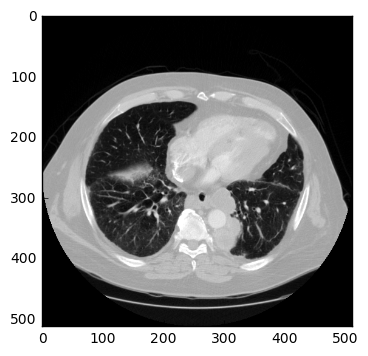

data
[-97.81603679  81.30889807  58.1060597 ]
[  96.07358528  355.11962503  329.51614638]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


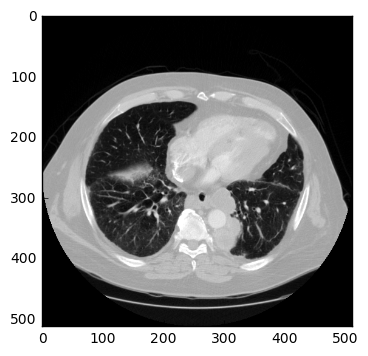

data
[-109.8084416    85.02525992   67.61451718]
[  91.27662336  359.65004972  341.10741557]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


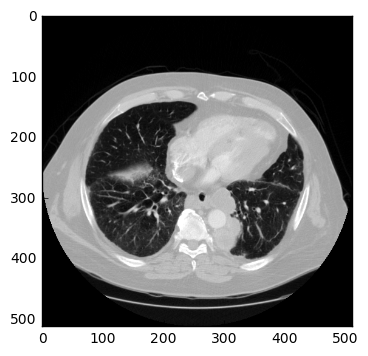

data
[-119.27056405   92.88733104   75.72122431]
[  87.49177438  369.23429437  350.98988334]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


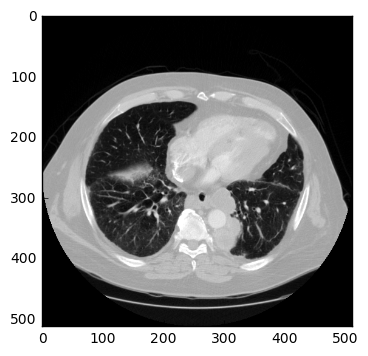

data
[-114.66476664   83.23996622   57.3694277 ]
[  89.33409334  357.47369043  328.61815637]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


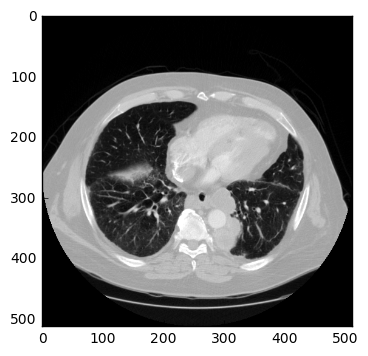

data
[-121.43016834   79.45526802   75.22399495]
[  86.62793267  352.85996041  350.38373672]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


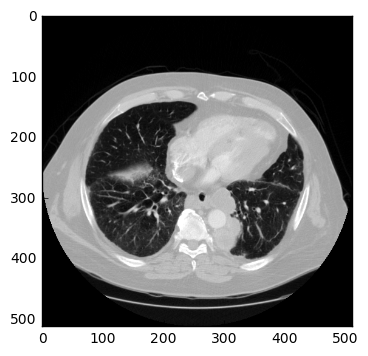

data
[-164.49  -11.56  113.84]
[  69.404       241.90795014  397.45851309]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


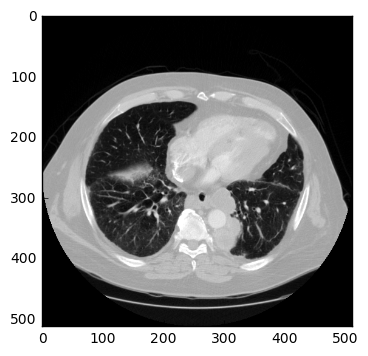

data
[-121.79346967   81.89220591   66.82147329]
[  86.48261213  355.83070547  340.14065674]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


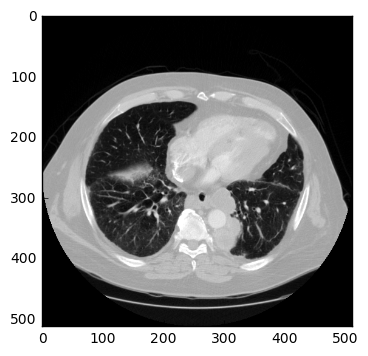

data
[-238.6002813    67.07660635  102.8434969 ]
[  39.75988748  337.76977361  384.05324438]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


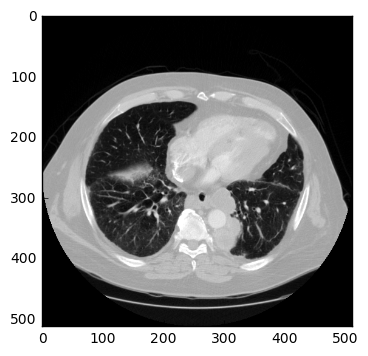

data
[-104.81808429   73.39545115   70.85836054]
[  93.27276628  345.4727508   345.06181739]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


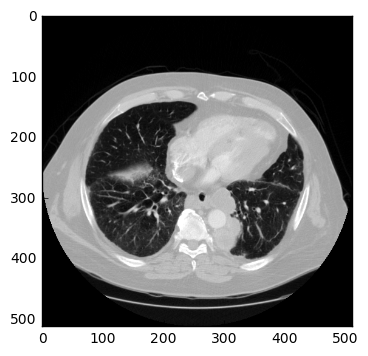

data
[-111.76505085  -44.6784946    59.76413994]
[  90.49397966  201.53490468  331.53742632]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


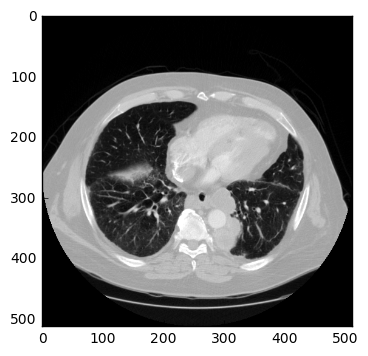

data
[-116.15692235   35.37156869   23.41469413]
[  88.73723106  299.11980047  287.2256952 ]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


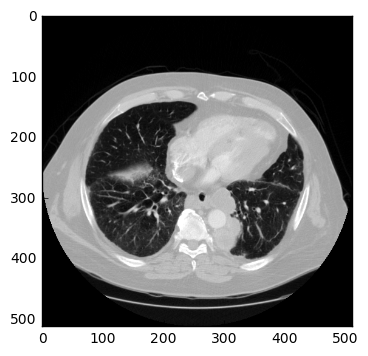

data
[-121.08423755   76.60274723   69.44152859]
[  86.76630498  349.38259971  343.33463077]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[-338.       -210.       -212.199997]


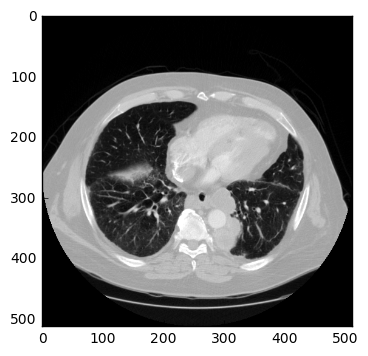

In [151]:
# get candidates
for cand in cands[1:]:
    worldCoord = np.flipud(np.ndarray.astype(np.array(cand[1:4]),dtype='float')) #  np.asarray([float(cand[3]),float(cand[1]),float(cand[2])])
    voxelCoord = worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)
    voxelWidth = 50
    patch = numpyImage[50,:,:]
#     patch = numpyImage[voxelCoord[0],:,:]
#     patch = numpyImage[voxelCoord[0],voxelCoord[1]-voxelWidth/2:voxelCoord[1]+voxelWidth/2,voxelCoord[2]-voxelWidth/2:voxelCoord[2]+voxelWidth/2]
    patch = normalizePlanes(patch)
    print ('data')
    print (worldCoord)
    print (voxelCoord)
    print (patch)
    print (numpyOrigin)
    outputDir = 'patches/'
    plt.imshow(patch*255, cmap='gray', vmin=0.,vmax=255.)
    plt.show()
    Image.fromarray(patch*255).convert('L').save("/Volumes/Backups/data/LUNA16/" + outputDir + 'patch_' + str(worldCoord[0])  + '_' + str(worldCoord[1]) + '_' + str(worldCoord[2]) + '.tiff')

In [12]:
data_path =  "/Volumes/Backups/data/LUNA16/"

In [13]:
image = sitk.ReadImage(data_path + "subset1/1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886.mhd")

In [14]:
print (image.GetSize()[2])

123


In [15]:
print (image.GetOrigin())
print (image.GetSpacing())
print (image.GetDirection())

print (image.GetNumberOfComponentsPerPixel())

(-212.199997, -210.0, -338.0)
(0.8203120231628418, 0.8203120231628418, 2.5)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
1


In [16]:
def runfunc():    
    count_images = 0
    slice_array = np.zeros((image.GetSize()[2]-2,3,512,512))
    for i in range(image.GetSize()[2]-2):
        slice = np.zeros((3,512,512))
        for j in range(3):
            slice_array[i][j]=(sitk.GetArrayFromImage(image)[i+j]) 
        count_images += 1
    print (count_images)

In [17]:
def get_3dslice(d_image,slice_loc):
    slice = sitk.GetArrayFromImage(d_image)[slice_loc-1:slice_loc+2]
    return slice

In [2]:
def get_5dslice(d_image,slice_loc):
    slice = sitk.GetArrayFromImage(d_image)[slice_loc-2:slice_loc+3]
    return slice


In [3]:
get_5dslice(image,91)

NameError: name 'image' is not defined

In [18]:
def create_slice_array(image):
    num_layers = image.GetSize()[2]-2
    print(num_layers)
    slice_array = np.zeros((image.GetSize()[2]-2,3,512,512))
    for i in range(num_layers):
        slice =  np.zeros((3,512,512))
        slice_array[i] = get_3dslice(image,i+1)
    slice_array = slice_array.transpose(0,2,3,1)
    return slice_array

In [19]:
%time color_array = create_slice_array(image)

121
CPU times: user 1.95 s, sys: 1.97 s, total: 3.93 s
Wall time: 4.01 s


In [20]:
color_array.shape

(121, 512, 512, 3)

In [123]:
np.flipud(np.array([1,2,3]))

array([3, 2, 1])